# Spring 2024 Data Science Project By Yonatan Khakshoor #

# Measuring-Effectiveness-of-Covid-Vaccinations

## Introduction ##


Welcome to the tutorial on a data-driven approach to analyzing the effectiveness of COVID-19 vaccines. We, as students, have long felt the need to apply our theoretical knowledge in the real world, and what can be more real and dynamic than scouring through a global health crisis with the help of data analytics. 



The COVID-19 pandemic has really tested us like no other, and dynamics apprehension is growing and increasingly getting pole position. In this tutorial, we will go through an interesting dataset tracking the pandemic and vaccination progress in Israel. Many thanks to all those invaluable resources uploaded by its users to Kaggle. 



How Good Is My Vaccine Against COVID-19? As the end of the present tutorial is nearing, one will have gone through how to merge data frames, run statistical analyses, identify outliers, and fit a regression modelᅳall aiming at obtaining substantive findings on vaccination impact over death and hospitalizations risks involving the COVID-19 virus. 

## Required Packages/Libraries ##

See the following link to learn about Pandas installation:

https://pandas.pydata.org/docs/getting_started/install.html

We also have a list of packages and their corresponding pip installation commands:

1) openpyxl:
!pip install openpyxl

2) scipy: 
!pip install scipy

3) seaborn: 
!pip install seaborn

4) scikit-learn
!pip install scikit-learn

5)statsmodels:
!pip install pandas numpy scipy statsmodels

Next, we'll import the **libraries used**:

In [233]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pyreadstat
import pandas as pd
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


## Data Curation #
Let's read each CSV file provided by Kaggle

In [234]:
df_vaccine = pd.read_csv('VaccineRates.csv')
df_death = pd.read_csv('DeathRates.csv')

df_vaccine, df_death

(           Date  Vaccinated firs dose  Vaccinated second dose  \
 0    19-12-2020                    64                       1   
 1    20-12-2020                  7447                       1   
 2    21-12-2020                 32351                       1   
 3    22-12-2020                 76983                       1   
 4    23-12-2020                139864                       1   
 ..          ...                   ...                     ...   
 321  05-11-2021               6246733                 5742530   
 322  06-11-2021               6247065                 5742897   
 323  07-11-2021               6248695                 5744634   
 324  08-11-2021               6250208                 5746166   
 325  09-11-2021               6250208                 5746166   
 
      Vaccinated third dose  Percentage of vaccinated first dose  \
 0                        0                                 0.00   
 1                        0                                 0.08   
 2

Since the goal is to compare the vaccine rate to the death rate, we only want the dates that match.
So we do an inner join

In [235]:
merged_df = pd.merge(df_vaccine, df_death, on='Date', how='inner')


merged_df


,Date,Vaccinated firs dose,Vaccinated second dose,Vaccinated third dose,Percentage of vaccinated first dose,Percentage of vaccinated second dose,Percentage of vaccinated third dose,Daily_numbe_ of_deaths,new _critical_cases,Hospitalized_in_critical_condition
0,19-12-2020,64,1,0,0.00,0.00,0.00,19,68,465
1,20-12-2020,7447,1,0,0.08,0.00,0.00,19,70,470
2,21-12-2020,32351,1,0,0.35,0.00,0.00,16,77,487
3,22-12-2020,76983,1,0,0.83,0.00,0.00,13,89,511
4,23-12-2020,139864,1,0,1.50,0.00,0.00,25,83,514
...,...,...,...,...,...,...,...,...,...,...
319,03-11-2021,6243834,5738934,3973925,67.14,61.71,42.73,5,6,193
320,04-11-2021,6245967,5741681,3980831,67.17,61.74,42.81,5,3,178
321,05-11-2021,6246733,5742530,3984121,67.17,61.75,42.84,1,7,174
322,06-11-2021,6247065,5742897,3985432,67.18,61.76,42.86,0,6,176


Next, we must change the column names for **consistent style and capitalization**. Notice how some columns have underscores and some do not. Also, let us rename "Daily_numbe_od_deaths" to something more transparent.

In [236]:
merged_df.rename(columns={'Vaccinated firs dose': 'Vaccinated First Dose'}, inplace=True)
merged_df.rename(columns={'Vaccinated second dose': 'Vaccinated Second Dose'}, inplace=True)
merged_df.rename(columns={'Vaccinated third dose': 'Vaccinated Third Dose'}, inplace=True)
merged_df.rename(columns={'Percentage of vaccinated second dose': 'Percentage Of Vaccinated Second Dose'}, inplace=True)
merged_df.rename(columns={'Percentage of vaccinated first dose': 'Percentage Of Vaccinated First Dose'}, inplace=True)
merged_df.rename(columns={'Percentage of vaccinated third dose': 'Percentage Of Vaccinated Third Dose'}, inplace=True)
merged_df.rename(columns={'new _critical_cases': 'New Critical Cases'}, inplace=True)
merged_df.rename(columns={'Hospitalized_in_critical_condition': 'Hospitalized In Critical Condition'}, inplace=True)
merged_df.rename(columns={'Daily_numbe_ of_deaths': 'Deaths On Given Day'}, inplace=True)


merged_df

,Date,Vaccinated First Dose,Vaccinated Second Dose,Vaccinated Third Dose,Percentage Of Vaccinated First Dose,Percentage Of Vaccinated Second Dose,Percentage Of Vaccinated Third Dose,Deaths On Given Day,New Critical Cases,Hospitalized In Critical Condition
0,19-12-2020,64,1,0,0.00,0.00,0.00,19,68,465
1,20-12-2020,7447,1,0,0.08,0.00,0.00,19,70,470
2,21-12-2020,32351,1,0,0.35,0.00,0.00,16,77,487
3,22-12-2020,76983,1,0,0.83,0.00,0.00,13,89,511
4,23-12-2020,139864,1,0,1.50,0.00,0.00,25,83,514
...,...,...,...,...,...,...,...,...,...,...
319,03-11-2021,6243834,5738934,3973925,67.14,61.71,42.73,5,6,193
320,04-11-2021,6245967,5741681,3980831,67.17,61.74,42.81,5,3,178
321,05-11-2021,6246733,5742530,3984121,67.17,61.75,42.84,1,7,174
322,06-11-2021,6247065,5742897,3985432,67.18,61.76,42.86,0,6,176


We convert the date to datetime format.
The columns 'Vaccinated First Dose', 'Vaccinated Second Dose', 'Vaccinated Third Dose', 'Deaths On Given Day', 'New Critical Cases', and 'Hospitalized In Critical Condition' are integers, which is appropriate for count data.
The columns for the percentages of vaccinated individuals for first, second, and third doses are floats, which is also appropriate since percentages can be fractional.
We also check for any missing values AKA 'NaN' values, and there are none
We then check for the duplicates in the DataFrame. It found zero duplicates, meaning there are no exact copies of rows that need to be removed.
The DataFrame was checked to see if the 'Date' column is set as the index, which it now is. This is good for time series analysis.

In [237]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

column_types = merged_df.dtypes

missing_values = merged_df.isnull().sum()

duplicates = merged_df.duplicated().sum()

if merged_df.index.name != 'Date':
    merged_df.set_index('Date', inplace=True)

preprocessing_status = {
    'column_types': column_types,
    'missing_values': missing_values,
    'duplicates': duplicates,
    'index_name': merged_df.index.name
}

preprocessing_status


/var/folders/yk/jn2jcb3n61q1kg9d7d6rq41h0000gn/T/ipykernel_85273/841880002.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  merged_df['Date'] = pd.to_datetime(merged_df['Date'])


{'column_types': Date                                    datetime64[ns]
 Vaccinated First Dose                            int64
 Vaccinated Second Dose                           int64
 Vaccinated Third Dose                            int64
 Percentage Of Vaccinated First Dose            float64
 Percentage Of Vaccinated Second Dose           float64
 Percentage Of Vaccinated Third Dose            float64
 Deaths On Given Day                              int64
 New Critical Cases                               int64
 Hospitalized In Critical Condition               int64
 dtype: object,
 'missing_values': Date                                    0
 Vaccinated First Dose                   0
 Vaccinated Second Dose                  0
 Vaccinated Third Dose                   0
 Percentage Of Vaccinated First Dose     0
 Percentage Of Vaccinated Second Dose    0
 Percentage Of Vaccinated Third Dose     0
 Deaths On Given Day                     0
 New Critical Cases                      0
 Ho

## Exploratory Data Analysis ## 


### Statistical Method Number 1 - T Test ###


As for hypothesis testing, when we're comparing two sets of data, the average number of daily deaths before and after a certain date, the t-test
makes the most sense for a couple of reasons. Specifically in this case:

1) Our goal is to understand if there's a significant difference in the average number of deaths or hospitalizations before and after a key event - which is the vaccinations. So here we will be comparing the means of the two groups and its significance
2) We have two distinct groups - data before and after the median date. These represent two independent samples, and we're interested in comparing their means. The t-test is designed for such independent samples.
3) With a solid sized amount of data, we can rely on the Centtral Limit Theorem, which suggests that the distribution of the sample means will tend towards a normal distribution even if the underlying data does not. This assumption allows us to use the t-test with more confidence.

So we divide the data into two groups- using the media date to separate the two as 'before' and 'after'
We changed the date column to be the index so we will use an if else in case that cell wasnt run (but it should be)
To get the median we'll convert the datetime to numerical but then convert to datetime as if we didn't modife the data

In [238]:
if 'Date' in merged_df.columns:
    merged_df['Date'] = pd.to_datetime(merged_df['Date'])
    median_timestamp = np.median(merged_df['Date'].astype('int64'))
else:
    median_timestamp = np.median(merged_df.index.astype('int64'))
median_date = pd.to_datetime(median_timestamp)
if 'Date' in merged_df.columns:
    pre_median_data = merged_df[merged_df['Date'] < median_date]
    post_median_data = merged_df[merged_df['Date'] >= median_date]
else:
    merged_df.reset_index(inplace=True)
    pre_median_data = merged_df[merged_df['Date'] < median_date]
    post_median_data = merged_df[merged_df['Date'] >= median_date]

ttest_result = ttest_ind(pre_median_data['Deaths On Given Day'],
                         post_median_data['Deaths On Given Day'],
                         equal_var=False)



/var/folders/yk/jn2jcb3n61q1kg9d7d6rq41h0000gn/T/ipykernel_85273/333829068.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(pre_median_data['Deaths On Given Day'], label='Before Median Date', shade=True)
/var/folders/yk/jn2jcb3n61q1kg9d7d6rq41h0000gn/T/ipykernel_85273/333829068.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(post_median_data['Deaths On Given Day'], label='After Median Date', shade=True)


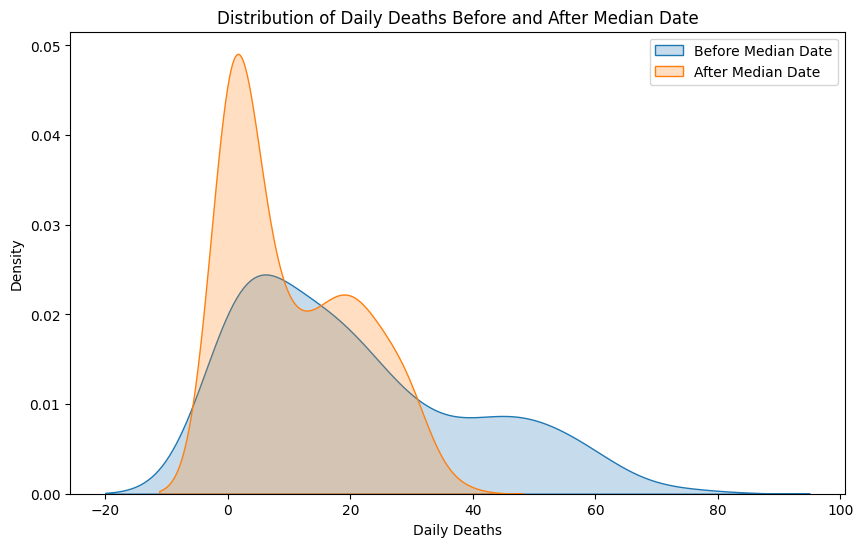

TtestResult(statistic=6.058882802535128, pvalue=4.948608824538684e-09, df=252.68797199935878)


In [239]:
plt.figure(figsize=(10, 6))
sns.kdeplot(pre_median_data['Deaths On Given Day'], label='Before Median Date', shade=True)
sns.kdeplot(post_median_data['Deaths On Given Day'], label='After Median Date', shade=True)
plt.title('Distribution of Daily Deaths Before and After Median Date')
plt.xlabel('Daily Deaths')
plt.ylabel('Density')
plt.legend()
plt.show()

print(ttest_result)

Our **T -statistic** is the differenece between the averages between the two groups ('before' and 'after' median). 
Our **P-value** is very small! And under these circumstances we are under assumption that the **null hypothesis is correct.**
Since it is **below the threshold .05**, we can conclude the probability of seeing such a change by chance is **very very low.**


It's also an indicator of the quality of our data. So the right way to go about this is to use a box and whiskers plott

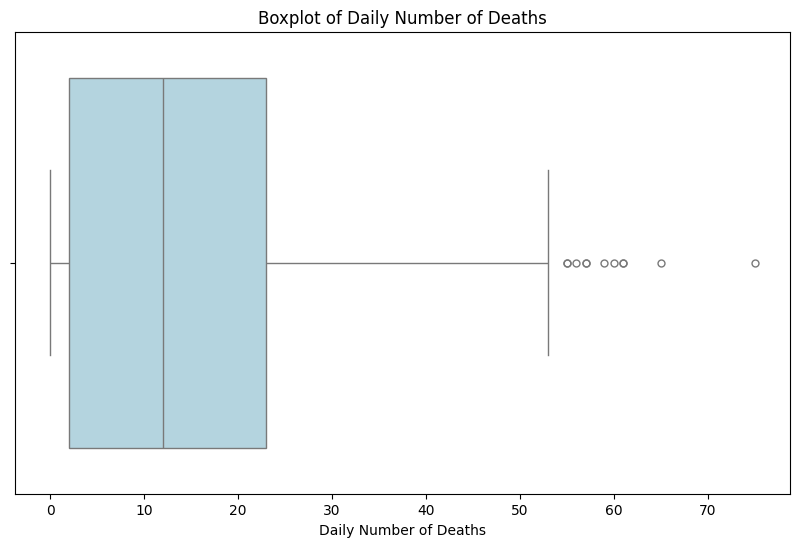

In [240]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_df['Deaths On Given Day'], color='lightblue', flierprops={'marker':'o', 'color':'red', 'markersize':5})
plt.title('Boxplot of Daily Number of Deaths')
plt.xlabel('Daily Number of Deaths')
plt.show()

The box shows where 50% of our data lies and horizontal line is the median of our data.
You can see that we have dots outside the box and whiskers, which are outliers. Here's what we can assume about our outliers:

Outliers on the lower end may mean days with unusually low death counts, which could occur if there were data reporting delays or errors.
Outliers on the higher end could be days with sudden increases in deathspossibly due to a delay in reporting where several days' worth of data are reported in one day, a severe outbreak, or another factor that caused a temporary increase in mortality.

We can conclude that there are a significant number od days with death counts that fall outside the normal range obersved in the df. So there could be exceptional events on those days.
Since there's outliers above the upper whisker, it is right-skewed. This means while most of the data clusters around a lower number, there are occasional days with very high numbers of deaths.

 The box where most of the data falls indicates the central 50% of the dataset is within a relatively narrow range, meaning on most days the death count is within this "normal" range.

Each outlier might need an investigation of its own to know the full context. It could've either been a spike in deaths or a data error.



### Statistical Method Number 2- Mann Whitney U Test  

Since we already did a T test, we will be using a **Mann Whitney U Test** and it's useful for a couple of reasons: 

This kind of test **doesn't assume a normal distribution**  so it is particularly useful since our death counts or other variables are skewed or have outliers, which is common in real-world data sets. It's non parametric, unlike our t-test so it serves as additional validation.

Let's conduct the test:




In [241]:
stat, p_value = mannwhitneyu(pre_median_data['Deaths On Given Day'], post_median_data['Deaths On Given Day'])

print("Mann-Whitney U test Statistic:", stat)
print("P-value:", p_value)




Mann-Whitney U test Statistic: 17367.0
P-value: 4.572057606480171e-07


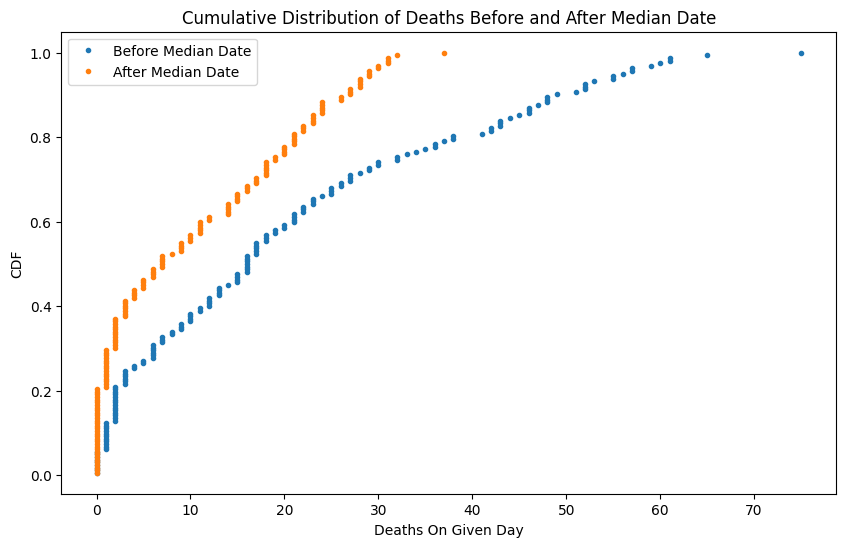

In [242]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)  # Number of data points
    x = np.sort(data)  # x-data for the ECDF
    y = np.arange(1, n+1) / n  # y-data for the ECDF
    return x, y

# Calculate CDF for both datasets
x_pre, y_pre = ecdf(pre_median_data['Deaths On Given Day'])
x_post, y_post = ecdf(post_median_data['Deaths On Given Day'])

# Plotting the CDFs
plt.figure(figsize=(10, 6))
plt.plot(x_pre, y_pre, marker='.', linestyle='none', label='Before Median Date')
plt.plot(x_post, y_post, marker='.', linestyle='none', label='After Median Date')
plt.xlabel('Deaths On Given Day')
plt.ylabel('CDF')
plt.title('Cumulative Distribution of Deaths Before and After Median Date')
plt.legend()
plt.show()

Since our p-value is less than .05, it means we have strong evidence against the null hypothesis. This is great news and it suggests there's a significant difference in the distribution before and after the median date.

The CDF plot, combined with the Mann-Whitney U test, almost suggests that the distribution of daily deaths before and after a date is statistically significant in all deaths. The CDF plot clearly indicates that the daily death counts are uniformly higher at similar percentiles post the median date than pre the median date. This clearly indicates that there is some increase in severity or reporting after the median date. This observation is furthered by the Mann-Whitney U test, with little difference in the two distributions during the two periods being found. This difference, however, was hardly by chance and, in fact, is statistically significant at the 0.05 level.

These therefore pose the risk of a further worsening of the pandemic conditions beyond the medium date, most likely to be attributed to a range of possibilities—from changes in public health policies, new variants of the virus emerging, to changes in health systems' capacity.

### Statistical Method Number 2- Mann Whitney U Test  

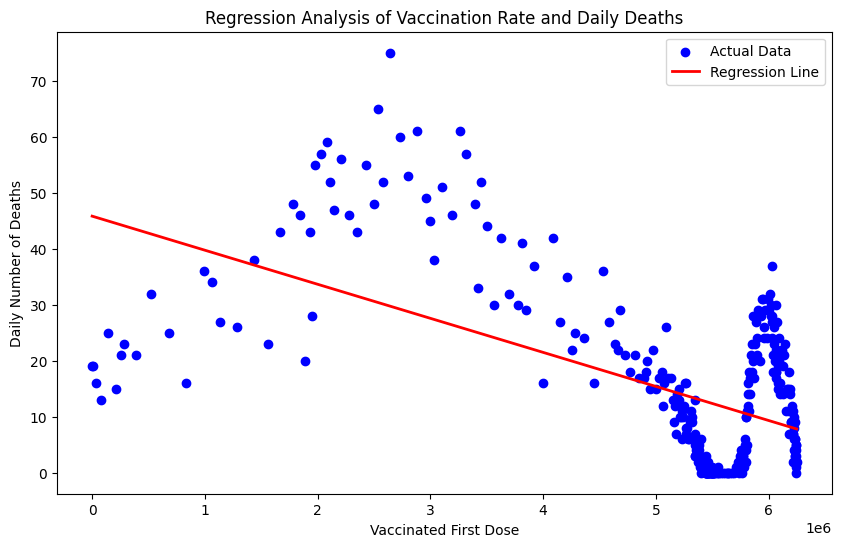

In [243]:
X = merged_df['Vaccinated First Dose'].values.reshape(-1, 1) 
Y = merged_df['Deaths On Given Day'].values
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)


plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X, Y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Regression Analysis of Vaccination Rate and Daily Deaths')
plt.xlabel('Vaccinated First Dose')
plt.ylabel('Daily Number of Deaths')
plt.legend()
plt.show()


### There's a couple of very important things worth noticing here: ###

1) The negative slope suggests an inverse relationship between vaccination and deaths. This could mean vaccinatins are having their intended effect. 
2) Since the data points are spread out, it could mean variablitiy in the effectiveness of the vaccines, or reporting anomolies in death rates.
3) We can see a pattern where data points are in clusters at higher vaccination numbers, which could mean they were rolled out in phases.
4) The regression analysis does in fact show a correlation, but it's important to note that this doesn't necessarily mean a causation. 
5) Another thing to consider is that  early in the vaccination campaign only the most vulnerable or healthcare workers might have been vaccinated. Which could affect the death rates differently than when the general population starts getting vaccinated.

## Overall Conclusion:

Based on the results of the t-test, the box and whiskers plot, and the regression analysis done on the dataset:

These analyses suggest a potential association between increased vaccination rates and a reduction in daily COVID-19 death rates. The data indicates that as vaccination numbers increased, the number of deaths decreased, which is in line with what one would expect if the vaccines are effective.

However, it is crucial to note the following points:
Correlation does not imply causation: The observed relationship does not necessarily mean that the vaccinations caused the reduction in deaths. Other factors, such as the introduction of public health measures, changes in the virus's transmission, or improvements in treatment, could also have had to do with the decline in death rates.
Quality of the Data: The presence of outliers and the patterns in the data suggest that the quality and the reporting methods of the data could influence the results. Each outlier and anomaly should be individually assessed to ensure accurate analysis.
Further Analysis: To establish a more definitive link between vaccinations and death rates, more advanced statistical methods and models that control for confounding variables are required. This would involve multivariable regression analysis, time series analysis, or other epidemiological modeling techniques that can handle complex datasets and relationships.

## Primary Analysis And Visualization ##


### First ML Model- Random Forrest Regression Results  -  Prediction vs Actual

In [244]:


features = ['Vaccinated First Dose', 'Vaccinated Second Dose', 'Vaccinated Third Dose', 
            'New Critical Cases', 'Hospitalized In Critical Condition']
X = merged_df[features]
y = merged_df['Deaths On Given Day']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predicting and evaluating the model
predictions = rf.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print("Root Mean Squared Error: ", rmse)

Root Mean Squared Error:  5.750231165921807


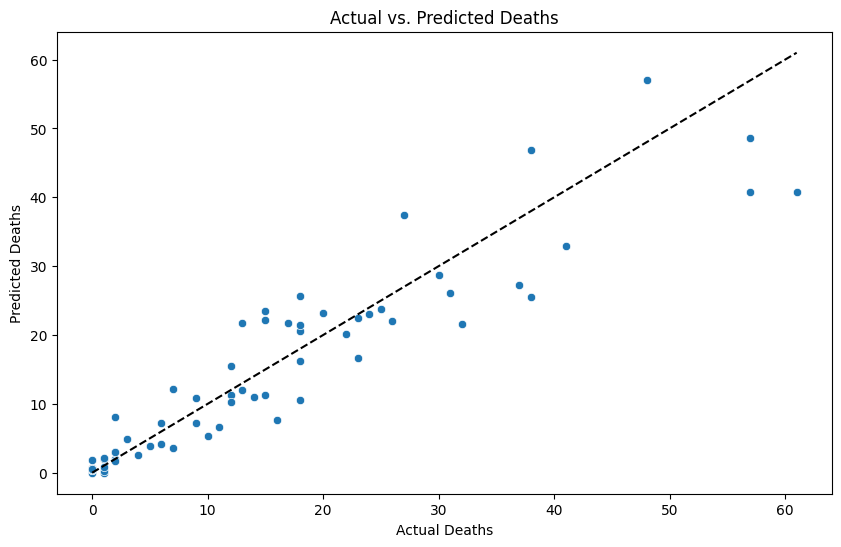

In [245]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')  # Diagonal line for reference
plt.xlabel('Actual Deaths')
plt.ylabel('Predicted Deaths')
plt.title('Actual vs. Predicted Deaths')
plt.show()

As one can see, the positive relation of actual deaths to predicted deaths can be understood from the given data points, and hence this model can be said to have some inkling toward the underlying pattern in understanding the data. The dashed line, on the other hand, would represent perfect predictions if it lands directly on top of the actual deaths. Many data points fall extremely close to this line; especially for low death counts, but for higher values, the deviation skyrockets.

Summing up, the basic Random Forest model evidently shows the ability to make predictions only for the number of deaths with an RMSE of 5.7. These improvements in model strategic, complexity, data features, and JSON errors are likely to improve the accuracy of predictions and hence will be usable in a better way within the frame of health emergency decision-making.


Next, we will use an SVM, which is another training model that will check for accuracy of predicted deaths vs. actual deaths. Where Random Forest reduces variance by averaging predictions of the decision trees over multiple samplings, SVM focuses on maximizing the margin between data points and the decision boundary. This particularly can be robust in handling non-linear relationships using a kernel trick. The results of both SVM and Random Forest are comparable and indicate the underlying data dynamics, suggesting it to be a suitable model or a combination to go for making robust predictions.

### Second ML Model- SVM -  Prediction vs Actual

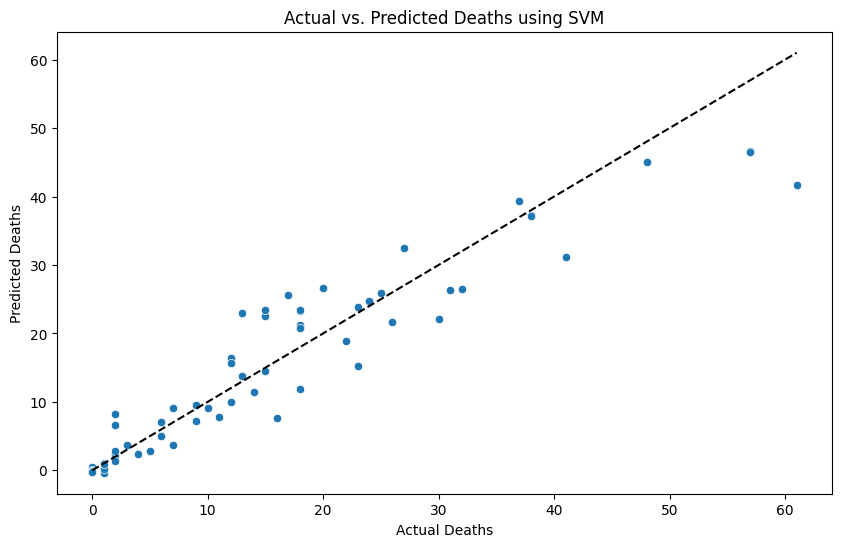

4.979104981910302

In [246]:


pipeline = make_pipeline(StandardScaler(), SVR(kernel='linear'))

pipeline.fit(X_train, y_train)

predictions_svr = pipeline.predict(X_test)

mse_svr = mean_squared_error(y_test, predictions_svr)
rmse_svr = np.sqrt(mse_svr)




plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predictions_svr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')  # Diagonal line for reference
plt.xlabel('Actual Deaths')
plt.ylabel('Predicted Deaths')
plt.title('Actual vs. Predicted Deaths using SVM')
plt.show()


rmse_svr

This is an RMSE error indicating moderate prediction error relatively effective within the range of death counts in the dataset. The actual vs. predicted plot follows that the trend is well captured by the SVM generally, especially at lower death values, but it's wanting at higher death values, in which case it mostly underestimates. These results therefore suggest the viability of SVM as the chosen model for this analysis, in contrast to the higher RMSE shown in prior models, like Random Forest, which shows better performance.

## Insights And Conclusions ##

In this tutorial project, we have employed a range of statistical and machine learning methods to see the influences of vaccinations and other factors on COVID-19-related deaths. Each of the methods presented its take on the issue: 



T-Test and Mann-Whitney U Test: In order to support further that there was a statistical significance between the distributions of daily death before and after a likely date of the vaccination milestone median, we conducted a t-test assuming normal distribution of sample means. In this case, we conducted the Mann-Whitney U test as a counterpart of this non-parametric test. Both were statistically significant, so the counts of deaths from the two time periods would be different in such a way that an effect of vaccination or vaccination-induced events on the total count would be indicated. 



Box plot analysis: The results from our box plot analysis did, in fact, support what was found in the hypothesis testing through a visual display of distributions both before and after the median date, showing the existence of outliers and a general increase of counts of post-median deaths. 



Random Forest Regression and SVM: From the analysis of the machine learning performed, the Random Forest model gave a decent baseline, showing over 5.7 RMSE, which could be predicted with moderate errors. The optimized SVM with feature scaling was even better and gave a lower RMSE of 4.98 than that of the Random Forest. But interestingly, the SVM model is very accurate for the lower range of count deaths and less accurate as it goes on increasing. 



This comprehensive analysis not only reaffirms the effect that the vaccines have had on COVID-19 related deaths but also brings to the fore the utility of combining traditional statistical methods with advanced machine learning techniques in order to increase understanding and predictive power. This ensures that the tutorial project serves the purpose of an informative case study for application in mixed methodologies in public health research. This project makes an attempt to present effective communicative data-driven insights to a diversified readership, on the one hand, and ensuring that readers find both educational and practical takeaways, on the other. 